## Import library

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline
plt.style.use('fivethirtyeight')


## Read data set

In [5]:
path ='file/'
#path = '../input/'
state_ts = pd.read_csv(path+'State_time_series.csv',parse_dates=['Date'])
print('Number of rows and columns in state ts:',state_ts.shape)

Number of rows and columns in state ts: (13026, 86)


In [115]:
state_ts.head()

,Date,RegionName,DaysOnZillow_AllHomes,HomesSoldAsForeclosuresRatio_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95100.0,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82700.0,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN


In [7]:
state_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13026 entries, 0 to 13025
Data columns (total 86 columns):
Date                                                             13026 non-null datetime64[ns]
RegionName                                                       13026 non-null object
DaysOnZillow_AllHomes                                            4458 non-null float64
HomesSoldAsForeclosuresRatio_AllHomes                            6701 non-null float64
InventorySeasonallyAdjusted_AllHomes                             4692 non-null float64
InventoryRaw_AllHomes                                            4692 non-null float64
MedianListingPricePerSqft_1Bedroom                               3397 non-null float64
MedianListingPricePerSqft_2Bedroom                               4379 non-null float64
MedianListingPricePerSqft_3Bedroom                               4408 non-null float64
MedianListingPricePerSqft_4Bedroom                               4478 non-null float64
MedianListing

In [14]:
state_ts.describe()

,DaysOnZillow_AllHomes,HomesSoldAsForeclosuresRatio_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
count,4458.000000,6701.000000,4692.000000,4692.000000,3397.000000,4379.000000,4408.000000,4478.000000,4407.000000,4443.000000,...,11854.000000,11420.000000,11750.000000,11750.000000,12324.000000,4050.000000,4050.000000,4132.000000,4050.000000,4050.000000
mean,112.027740,3.211209,34228.572677,34206.862958,181.167799,133.085113,127.318755,130.891410,133.029368,132.754400,...,104024.582419,154192.583187,170995.055319,175548.842553,292545.593963,1326.007160,1314.711111,0.925831,1234.125432,1332.264198
std,31.879683,5.136004,35573.522409,35663.442612,98.778811,72.439852,58.056593,57.319021,63.425883,66.097118,...,49380.181687,75594.175813,83016.252078,91498.990970,146781.307429,372.906087,369.247598,0.283080,367.755409,385.849062
min,43.000000,0.004200,971.000000,919.000000,58.333333,61.354167,59.093894,62.266501,65.674256,59.410646,...,32600.000000,42200.000000,56400.000000,56600.000000,70900.000000,800.000000,799.000000,0.560000,713.000000,800.000000
25%,91.406250,0.572500,10048.250000,9985.750000,126.824265,90.946610,91.937107,98.343610,99.175095,93.258131,...,67800.000000,110700.000000,116000.000000,116300.000000,193975.000000,1040.000000,1029.000000,0.726000,961.000000,1037.000000
50%,110.625000,1.599600,22504.500000,21869.000000,160.378101,118.962585,112.400176,116.890571,117.780634,115.604887,...,89200.000000,133750.000000,144900.000000,147500.000000,250100.000000,1212.000000,1206.000000,0.858000,1129.000000,1218.000000
75%,129.250000,3.679900,48926.500000,48504.500000,202.600580,151.198785,141.127723,142.769386,145.832859,149.101413,...,129700.000000,174400.000000,207900.000000,212500.000000,346125.000000,1488.000000,1474.750000,1.068000,1405.750000,1490.000000
max,796.500000,52.296500,261729.000000,269380.000000,597.001654,550.993587,462.341198,479.200000,615.639428,523.843385,...,335200.000000,749300.000000,608500.000000,722100.000000,980400.000000,2693.000000,2656.000000,2.294000,2608.000000,2758.000000


## Missing value

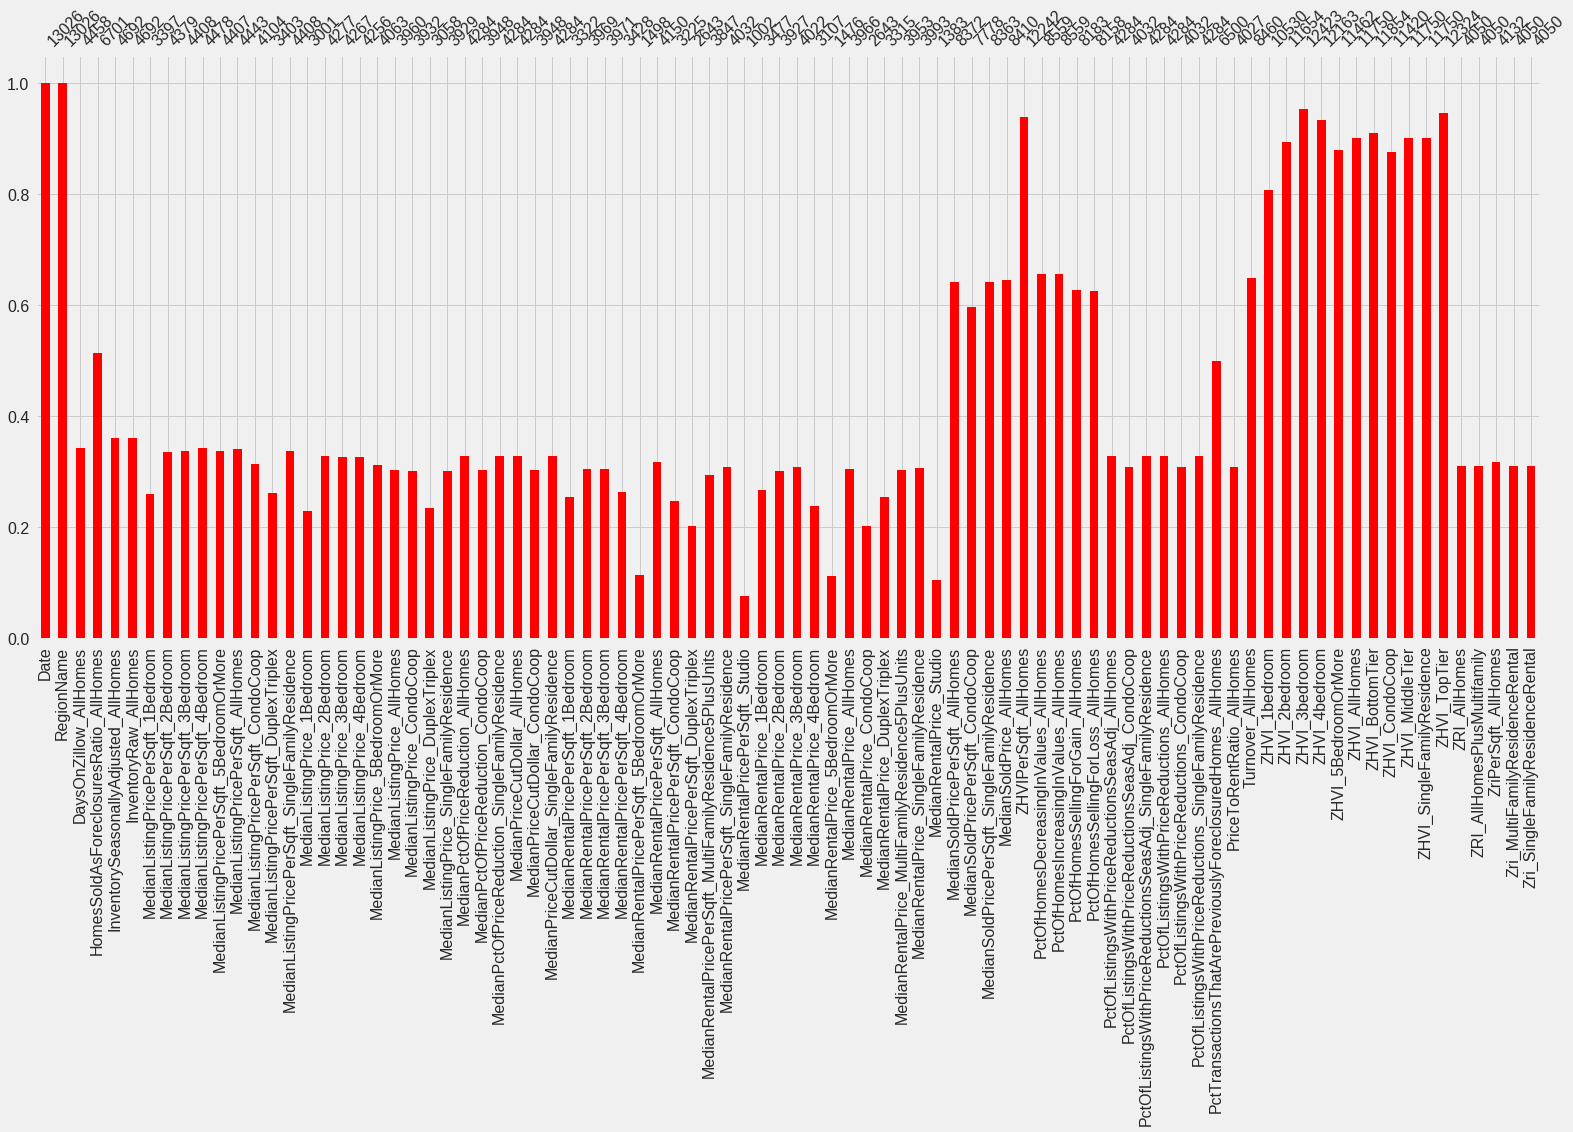

In [97]:
msno.bar(state_ts,color='r')

In [116]:
# percentage of missing value in data  set
missing = state_ts.isnull().sum().sum()
missing * 100/ (state_ts.shape[0]*state_ts.shape[1])

56.58334493803091

# Data analysis
 

In [41]:
print('Date range:{} to {}'.format(state_ts['Date'].min(),state_ts['Date'].max()))
print('\n',state_ts['Date'].describe())

Date range:1996-04-30 00:00:00 to 2017-08-31 00:00:00

 count                   13026
unique                    257
top       2012-10-31 00:00:00
freq                       52
first     1996-04-30 00:00:00
last      2017-08-31 00:00:00
Name: Date, dtype: object


The date range is 1996 to 2017, there are 13026 row in the data set. The sample of data availble for total 217 months.
It is better to resample data by month for our analysis

# Region Name

Number of States 52


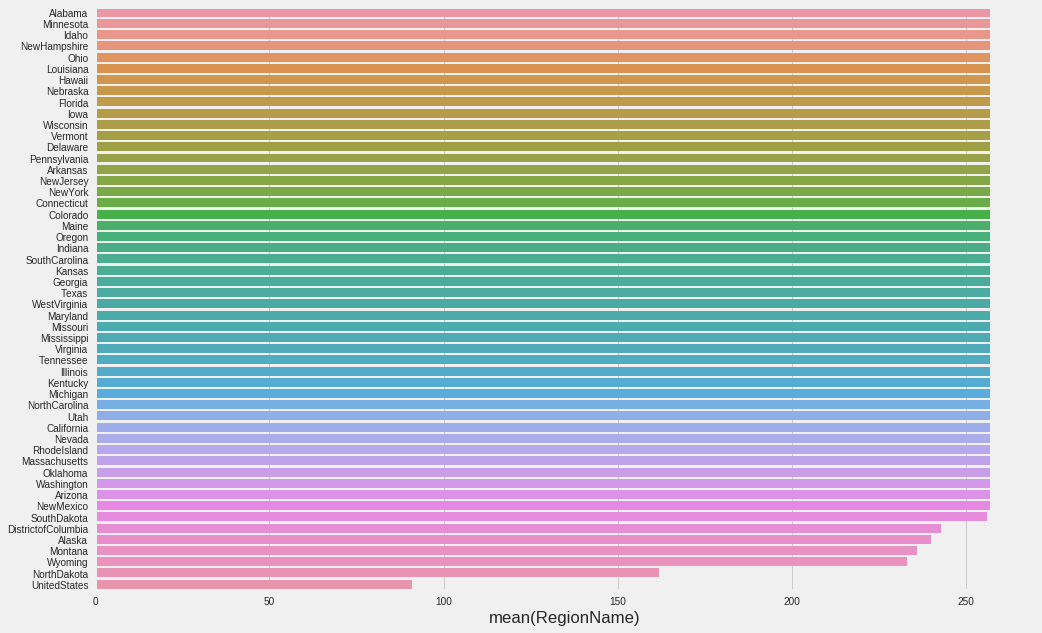

In [150]:
cnt = state_ts['RegionName'].value_counts().to_frame()
print('Number of States',state_ts['RegionName'].nunique())
#print(cnt.tail(8))
plt.figure(figsize=(15,10))
sns.barplot(cnt['RegionName'],cnt.index)

Thier are 52 states in USA, the data avalible in most of states are identical. 
The NorthDakota,UnitedStates having least data entry.

### DaysOnZillow_AllHomes

In [152]:
data = [go.Scatter(x=state_ts['Date'],y = state_ts['DaysOnZillow_AllHomes'],line = dict(color = '#17BECF'))]
layout = {'title': 'Days On Zillow All Homes', 'font': dict(size=16),'xaxis':{'range':['2010-01-01','2017-08-01']}}
#fig = dict(data,layout)
py.iplot({'data':data,
         'layout': layout})

In [199]:
# Sample data by region name
state_vise = state_ts.groupby(['RegionName']).median()
state_vise.shape

(52, 84)

### Resample

The whole data set is resampled monthly by median. We can also resample data by sum,count etc, but resampling by median will give better result. The sample of data availble for total 217 months.

In [192]:
state_month = state_ts.resample('M',on='Date').median()
state_month = state_month.reset_index()
state_month.shape

(257, 85)

In [193]:
data = [go.Scatter(x=state_month['Date'],y = state_month['DaysOnZillow_AllHomes'])]
layout = {'title': 'Days On Zillow All Homes', 'font': dict(size=16),'xaxis':{'range':['2010-01-01','2017-09-01']}}
#fig = dict(data,layout)
py.iplot({'data':data,
         'layout': layout})

Let's see median value by state

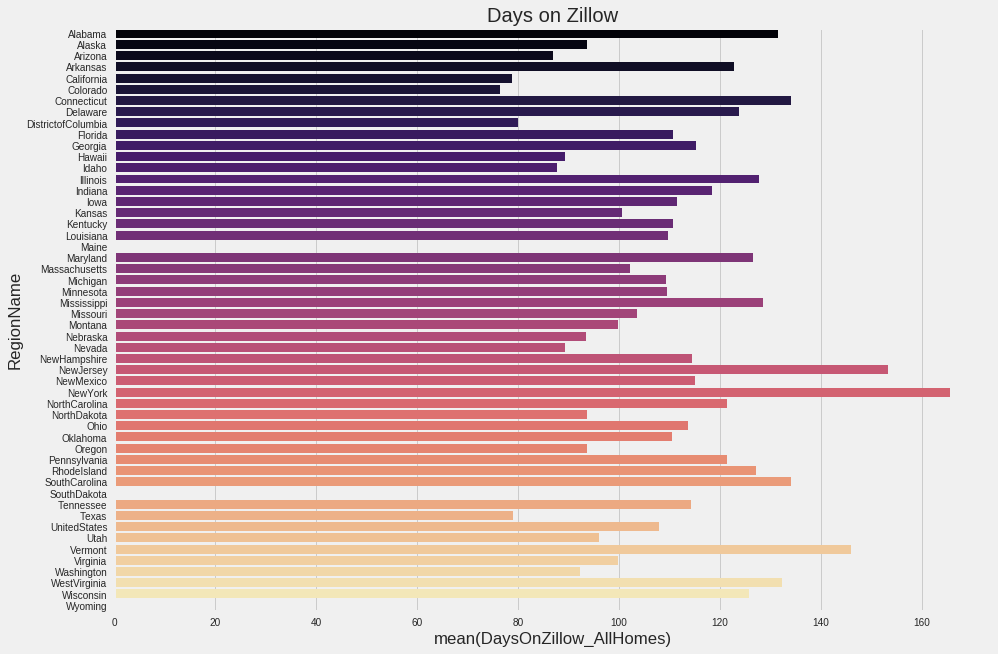

In [200]:
plt.figure(figsize=(14,10))
sns.barplot(state_vise['DaysOnZillow_AllHomes'],state_vise.index,palette='magma')

In [194]:
data = [go.Scatter(x = state_month['Date'], y = state_month['InventorySeasonallyAdjusted_AllHomes'],name = 'Seasonally')
       ,go.Scatter(x = state_month['Date'], y = state_month['InventoryRaw_AllHomes'],name = 'Raw')]
layout = {'title': 'Inventory of All Homes', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

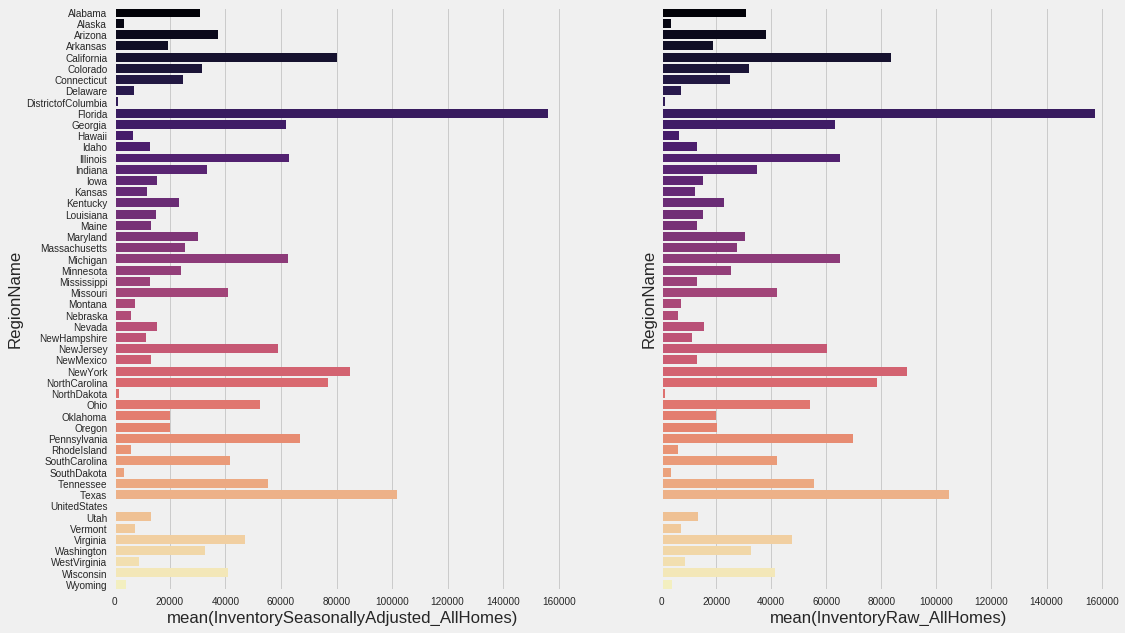

In [207]:
fig,ax = plt.subplots(1,2,figsize=(16,10),sharey='all')
ax1,ax2 = ax.flatten()
sns.barplot(state_vise['InventorySeasonallyAdjusted_AllHomes'],state_vise.index,palette='magma',ax=ax1)
sns.barplot(state_vise['InventoryRaw_AllHomes'],state_vise.index,palette='magma',ax=ax2)

In [195]:
data = [go.Scatter(x = state_month['Date'], y = state_month['HomesSoldAsForeclosuresRatio_AllHomes'],name = 'Sold')]
layout = {'title': 'Home Sold As Foreclosure Ratio of All Homes', 'font': dict(size=16)}

py.iplot({'data':data,'layout': layout})

Let's see median value by state

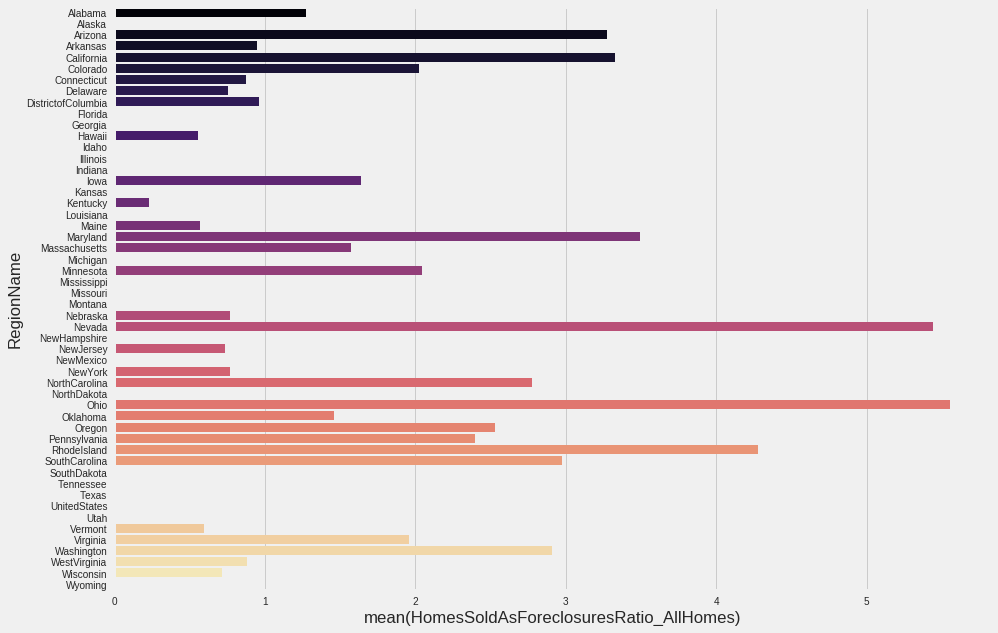

In [208]:
plt.figure(figsize=(14,10))
sns.barplot(state_vise['HomesSoldAsForeclosuresRatio_AllHomes'],state_vise.index,palette='magma')

The real estate price reached pick value in the year 2010, which is decreased 4 time the pick value by now.

# Median value of own home per sqaure fit

In [218]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_SingleFamilyResidence'], name = 'Single Family'),
       ]
       
layout = {'title': 'Median Listing Price$/sqft', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

In [222]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_AllHomes'], name = 'All home'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_SingleFamilyResidence'], name = 'Single Family'),
       ]
       
layout = {'title': 'Median Own House Actual Price', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

# Median value of Rental home

In [225]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_SingleFamilyResidence'], name = 'Single Family'),
       ]
       
layout = {'title': 'Median Rental Price$/sqft', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

In [226]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_AllHomes'], name = 'All home'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_SingleFamilyResidence'], name = 'Single Family'),
       ]
       
layout = {'title': 'Median Rental Actual Price', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

## Thank you